In [1]:
#Active environment should be aws_env
!conda info | grep 'active env'

     active environment : aws_env
    active env location : /home/hassan101/anaconda3/envs/aws_env


In [3]:
import boto3
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# GETTING DATA

In [39]:
data_url = 'https://class-datasets.s3.ap-southeast-2.amazonaws.com/customer-churn.csv'
#!curl $data_url > raw-data.csv
!wget $data_url -O raw-data.csv

--2023-02-15 11:00:01--  https://class-datasets.s3.ap-southeast-2.amazonaws.com/customer-churn.csv
Resolving class-datasets.s3.ap-southeast-2.amazonaws.com (class-datasets.s3.ap-southeast-2.amazonaws.com)... 52.95.129.86
Connecting to class-datasets.s3.ap-southeast-2.amazonaws.com (class-datasets.s3.ap-southeast-2.amazonaws.com)|52.95.129.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/csv]
Saving to: ‘raw-data.csv’

raw-data.csv        100%[===================>] 954.59K  1.86MB/s    in 0.5s    

2023-02-15 11:00:02 (1.86 MB/s) - ‘raw-data.csv’ saved [977501/977501]



In [68]:
df_raw = pd.read_csv('raw-data.csv')
df_raw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
df_raw.head(5).T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


# PROCESSING DATA

In [71]:
from ydata_profiling import ProfileReport

In [116]:
df_ps1 = df_raw.copy()

In [117]:
# Making the column names uniform (all lower case, spaces replaced with _)
df_ps1.columns =df_ps1.columns.str.lower().str.replace(' ', '_')
cat_col = list(df_ps1.dtypes[df_ps1.dtypes == 'object'].index)
print('categorical:', cat_col)

#Making categorial values consistent (all lower case, spaces replaced with _)
for col in cat_col:
    df_ps1[col] = df_ps1[col].str.lower().str.replace(' ', '_')
df_ps1.head(5).T

categorical: ['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges', 'churn']


,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [118]:
#High-level overview of schema, and missing values
df_ps1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [119]:
'''
There are inaccuracies in data types: Senior citizen should be an object, but is an int. Total charges shouls be a number, but an object.
'''

'\nThere are inaccuracies in data types: Senior citizen should be an object, but is an int. Total charges shouls be a number, but an object.\n'

In [120]:
#Getting distribution and percentile information
df_ps1.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [121]:
'''
We clearly need to fix seniorcitizen
'''

'\nWe clearly need to fix seniorcitizen\n'

In [122]:
#Granular profiling of dataset
profile = ProfileReport(df_ps1, title='Customer Churn')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Some observations from Profile Report:
- totalcharges have 11 values with _. Data type is not correct either, should be a number but is an object.
- The label churn is given as Yes or No. We need to change this to numbers, i.e. 1 or 0.
- seniorcitizen have incorrect data type too. The values are either 0 and 1, so should have been an object but it is a number.

Some other concerns:
- phoneservice is highly imbalanced
- customerid has a high cardinality: 7043 distinct values (all are unique too)
- tenure is highly overall correlated with contract
- customerid and totalcharges are uniformly distributed

In [126]:
df_ps1.totalcharges.dtype

dtype('O')

In [131]:
df_ps2 = df_ps1.copy()

In [132]:
# we will change dtype of total charges to float. The conversion function will give error (due to_ values), so we set the error cells to nan.
df_ps2.totalcharges = pd.to_numeric(df_ps2.totalcharges, errors='coerce')
df_ps2.totalcharges.dtype

dtype('float64')

These _ values will be shown as null values

In [133]:
print('Null values in totalcharges:', df_ps2.totalcharges.isna().sum())
df_ps2[df_ps2.totalcharges.isna()][['customerid','totalcharges']]

Null values in totalcharges: 11


,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


We will replace these null values with 0

In [134]:
df_ps2.totalcharges = df_ps2.totalcharges.fillna(0)
print('Null values in totalcharges:', df_ps1.totalcharges.isna().sum())

Null values in totalcharges: 0


Now, we will change churn to 1/0 from yes/no

In [135]:
df_ps2.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [138]:
df_ps2.churn = (df_ps2.churn == 'yes').astype(int)
df_ps2.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Lets fix senior citizen too

In [157]:
df_ps2.seniorcitizen = df_ps2.seniorcitizen.replace((1, 0),('yes', 'no'))
df_ps2.seniorcitizen.head()

0    no
1    no
2    no
3    no
4    no
Name: seniorcitizen, dtype: object

In [158]:
#Looking at Pearson correlations again
df_ps2.corr()

/tmp/ipykernel_17375/4122205415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ps2.corr()


,tenure,monthlycharges,totalcharges,churn
tenure,1.000000,0.247900,0.826178,-0.352229
monthlycharges,0.247900,1.000000,0.651174,0.193356
totalcharges,0.826178,0.651174,1.000000,-0.198324
churn,-0.352229,0.193356,-0.198324,1.000000


<AxesSubplot: xlabel='monthlycharges', ylabel='totalcharges'>

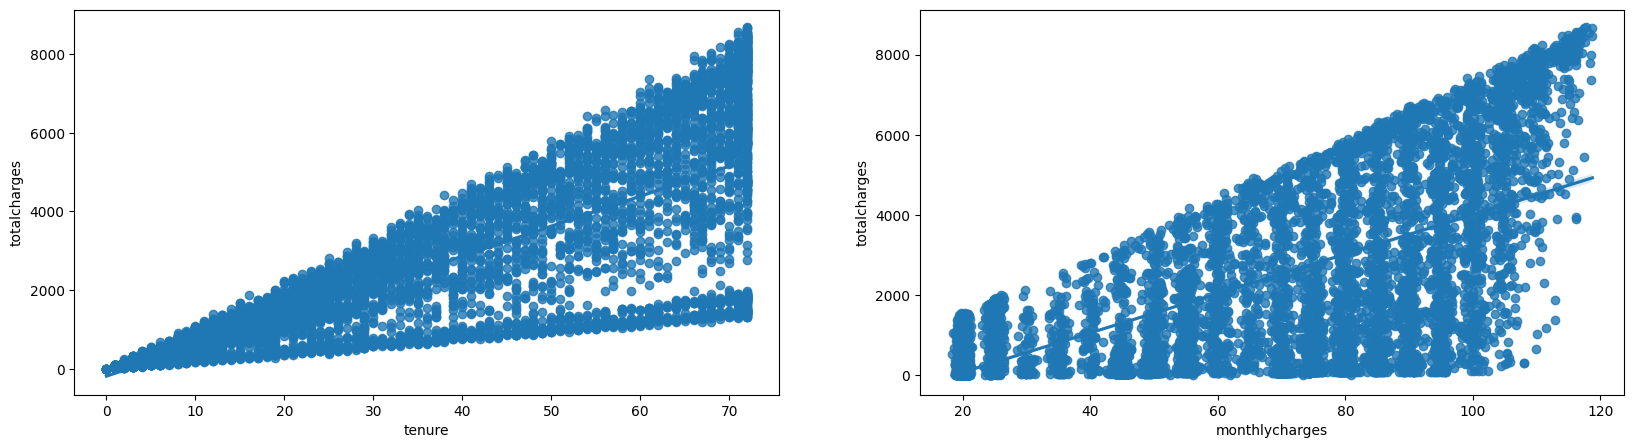

In [159]:
#Looking at strong correlations between some numerical features
fig, ax =plt.subplots(1,2,figsize=(20, 5))
sns.regplot(x='tenure', y='totalcharges', data=df_ps2,ax=ax[0])
sns.regplot(x='monthlycharges', y='totalcharges', data=df_ps2,ax=ax[1])

We can leave this be for now

In [160]:
df_ps2.dtypes

customerid           object
gender               object
seniorcitizen        object
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [161]:
df_ps2.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,no,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,no,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,no,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,no,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,no,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


# STORING DATA

In [162]:
df_processed = df_ps2

In [163]:
#Get AWS credentials from environment
import os
aws_akid = os.environ['AWS_KID']
aws_sak = os.environ['AWS_AK']

client = boto3.client('iam', aws_access_key_id=aws_akid, aws_secret_access_key= aws_sak)
users = client.list_users()
for key in users['Users']:
    print('Active User:', key['UserName'])

Active User: usr_hassan


In [164]:
#Authentication
res_s3 = boto3.resource('s3', aws_access_key_id=aws_akid, aws_secret_access_key= aws_sak)
client_s3 = boto3.client('s3', aws_access_key_id=aws_akid, aws_secret_access_key= aws_sak) 

In [166]:
# Create new bucket in syd region (If this gives client error change bucket name)

bucket_processed_name = 'class-dataset-processed'

def create_bucket(bucket_processed_name,delete_if_exists):
    global processed_bucket
    if (bucket_processed_name not in [i.name for i in res_s3.buckets.all()]):
        processed_bucket = res_s3.create_bucket(
                                Bucket=bucket_processed_name,
                                CreateBucketConfiguration={'LocationConstraint': 'ap-southeast-2'},
                                #ACL="public-read",
                                ACL="private"
                                )
        print(f"BUCKET {processed_bucket} CREATED")
    else:
        print("BUCKET ALREADY EXISTS")
        if delete_if_exists==True:
            print("Checking contents...")
            objects = client_s3.list_objects_v2(Bucket=bucket_processed_name)
            fileCount = objects['KeyCount']
            print('Files in bucket:',fileCount)
            if fileCount > 0:
                print('Emptying bucket')
                res_s3.Bucket(bucket_processed_name).objects.all().delete()
            client_s3.delete_bucket(Bucket=bucket_processed_name)
            print(f'Existing BUCKET {bucket_processed_name} DELETED, run this cell again to create a new one')
    return
create_bucket(bucket_processed_name,delete_if_exists=True)

BUCKET s3.Bucket(name='class-dataset-processed') CREATED


In [167]:
with io.StringIO() as csv_buffer:
    df_processed.to_csv(csv_buffer, index=False)

    response = client_s3.put_object(
        Bucket=bucket_processed_name, Key="customer-churn-processed.csv", Body=csv_buffer.getvalue()
    )

    status = response.get("ResponseMetadata", {}).get("HTTPStatusCode")

    if status == 200:
        print(f"Successful S3 put_object response. Status - {status}")
    else:
        print(f"Unsuccessful S3 put_object response. Status - {status}")

Successful S3 put_object response. Status - 200
